In [1]:
library('kedd')

Задаем ядра

In [2]:
epanechnikov <- function(x) {
    if (abs(x) <= 1) {
        return(3 * (1 - x ^ 2) / 4)
    } else {
        return(0)
    }
}

normal <- function(x) {
    return(exp(- (x ^ 2) / 2) / sqrt(2 * pi))
}

Делаем генератор выборки как в прошлом ДЗ

In [3]:
p <- function(x) {
    if (abs(x) <= 2) {
        return(3 * (2 * abs(x) - x ^ 2) / 8)
    } else {
        return(0)
    }
}

g <- function(x) {
    ifelse((x <= 2) & (x >= -2), 1, 0) 
}
c <- 50

In [4]:
# Пишем, функцию - генератор
generate <- function(f) {
    repeat {
        Y <- runif(n=1, min = -2, max = 2)
        t <- runif(n=1)
        if (t <= f(Y) / (c * g(Y))) {
            return(Y)
        }
    }
}

In [5]:
# Генерируем выборку нужного размера
N = 2000
sample = generate(p)
for (i in 2:N) {
    sample = c(sample, generate(p))
}

Warning message in if (abs(x) <= 2) {:
“длина условия > 1, будет использован только первый элемент”

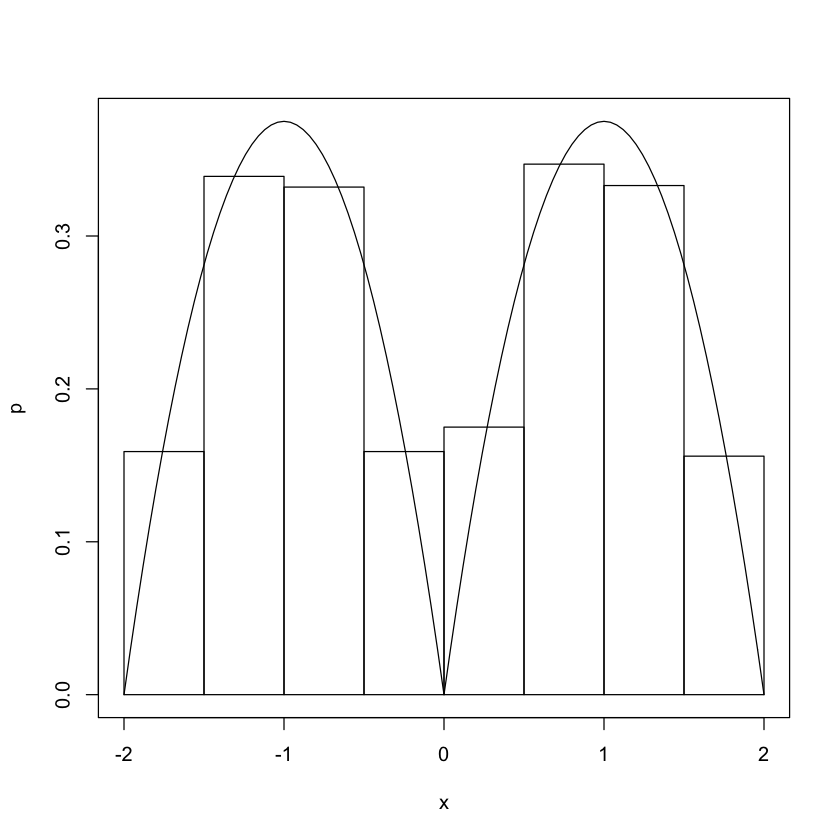

In [6]:
# Построим и сравним график плотности и гистограмму сгенерированных данных
plot(p, -2, 2)
hist(sample, add = TRUE, probability = TRUE)

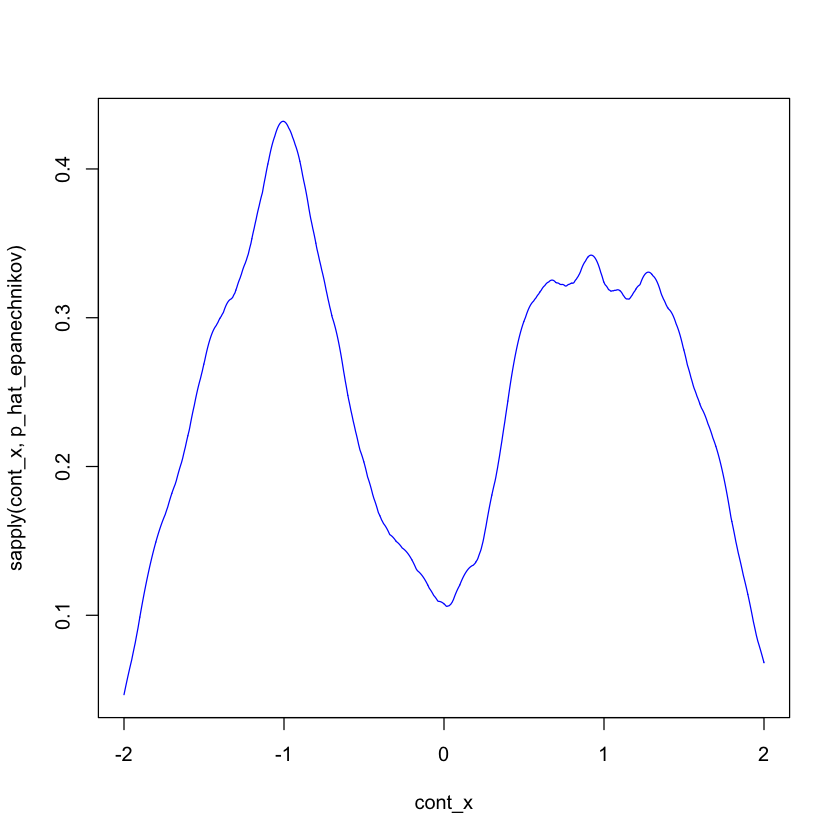

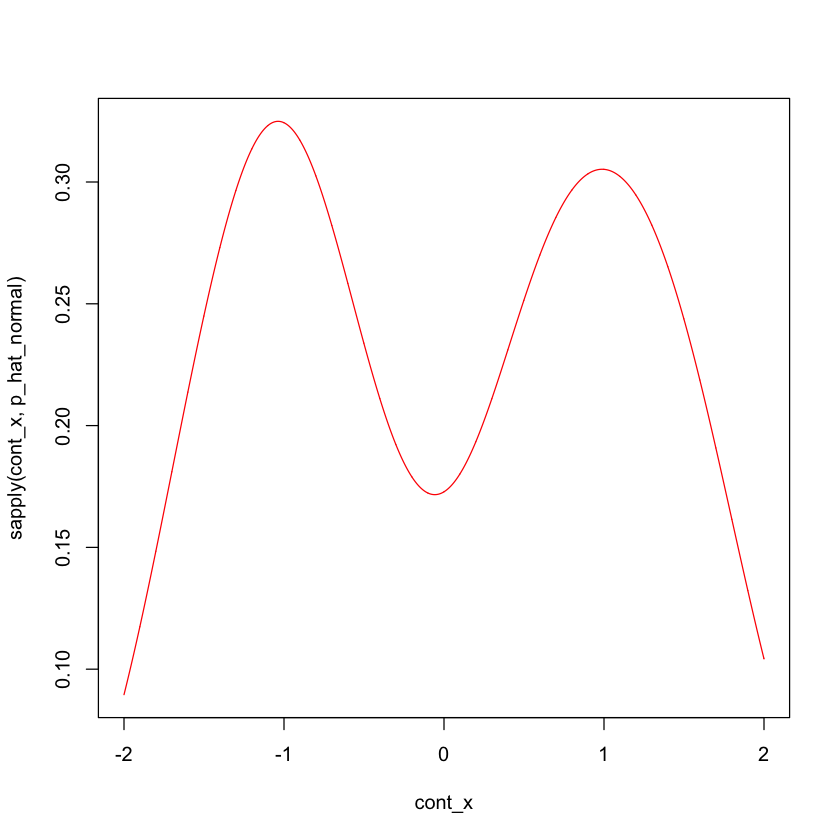

In [7]:
# Построим графики оценок плотностей

cont_x = seq(from = -2, to = 2, by = 0.001)
n <- 100
h <- 1 / n ^ (1 / 5)
X <- vector(length = 0)
for (i in 1:n) {
    X <- c(X, generate(p))
}
p_hat_epanechnikov <- function(x) {
    return(mean(sapply((x - X) / h, epanechnikov)) /  h)
}

p_hat_normal <- function(x) {
    return(mean(sapply((x - X) / h, normal)) /  h)
}
plot(cont_x, sapply(cont_x, p_hat_epanechnikov), type = 'l', col = 'blue')
plot(cont_x, sapply(cont_x, p_hat_normal), type = 'l', col = 'red')

In [8]:
ro <- function(f, g) {
    cont_x = seq(from = -2, to = 2, by = 0.001)
    return(max(abs(sapply(cont_x, f) - sapply(cont_x, g))))
}

Ширину окна пропускания выбираем в соответствии с теоремой с лекции. $h=\frac{С}{n^{\frac{1}{5}}}$

In [9]:
# Считаем метрику в зависимости от n
ns <- seq(from = 100, to = 1000, by = 50)
epanechnikov_errors <- vector(length = 0)
normal_errors <- vector(length = 0)
for (n in ns) {
    h <- 1 / n ^ (1 / 5)
    X <- vector(length = 0)
    for (i in 1:n) {
        X <- c(X, generate(p))
    }

    p_hat_epanechnikov <- function(x) {
        return(mean(sapply((x - X) / h, epanechnikov)) /  h)
    }

    p_hat_normal <- function(x) {
        return(mean(sapply((x - X) / h, normal)) /  h)
    }

    epanechnikov_errors <- c(epanechnikov_errors, ro(p, p_hat_epanechnikov))
    normal_errors <- c(normal_errors, ro(p, p_hat_normal))
}

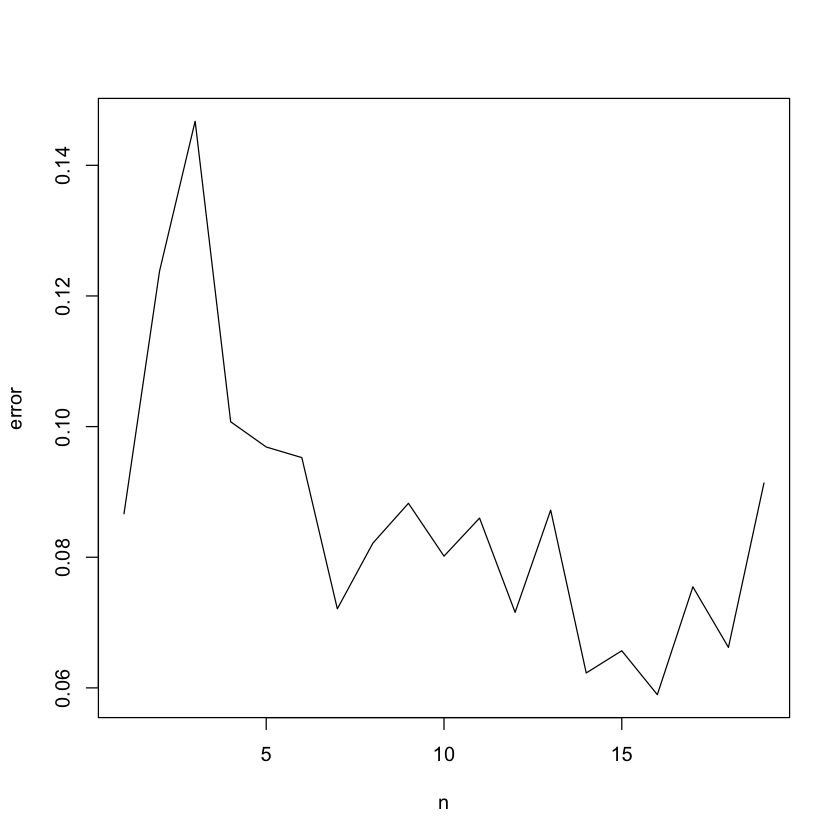

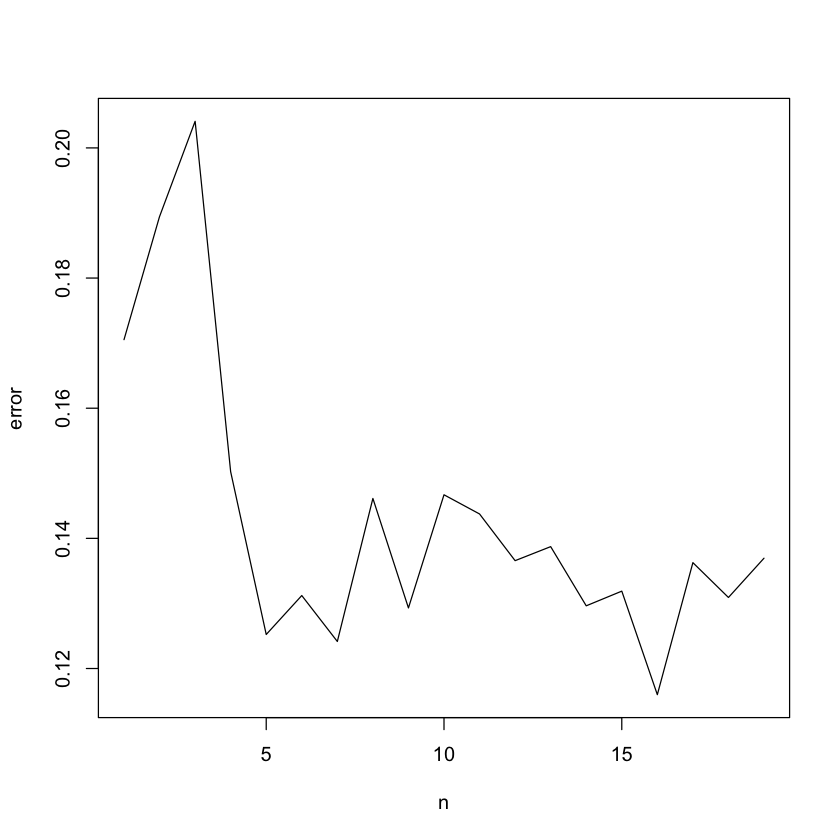

In [10]:
plot(epanechnikov_errors, type = 'l', ylab = 'error', xlab = 'n')
plot(normal_errors, type = 'l', ylab = 'error', xlab = 'n')

В выбраной метрике для выбраных ядер получаются похожие результаты. Различие между оценками состоит в том, что гауссовское ядро дает более гладкую функцию.